# EDA

**Index**

1. [Import libraries](#import-libraries)
2. [Import data](#import-data)
3. [Exploration data](#exploration-data)
4. [Columns description](#columns-description)
5. [Distribution of numerical variables](#Distribution-of-numerical-variables)
    [Treatment of Cholesterol](#Treatment-of-Cholesterol)
6. [Distribution of categorical variables](#Distribution-of-categorical-variables)
7. [Correlation analysis between numerical variables](#Correlation-analysis-between-numerical-variables)
8. [Analysis of relationships between variables and the target](#Analysis-of-relationships-between-variables-and-the-target)
9. [Conclusions](#conclusions)

### Import libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

from toolbox_ML import *
from bootcampviztools import *

### Import data

In [20]:
# Define the paths to the CSV files
data_folder = '../data_sample'
data_path = os.path.join(data_folder, 'data_final.csv')

In [21]:
# Read the CSV files
df = pd.read_csv(data_path)

### Exploration data

In [22]:
# Display the first few rows
df.head()

,Age,ChestPainType,Cholesterol,ExerciseAngina,FastingBS,HeartDisease,MaxHR,Oldpeak,RestingBP,RestingECG,ST_Slope,Sex
0,63,TA,233.0,N,True,0,150.0,2.3,145.0,LVH,Down,M
1,67,ASY,286.0,Y,False,1,108.0,1.5,160.0,LVH,Flat,M
2,67,ASY,229.0,Y,False,1,129.0,2.6,120.0,LVH,Flat,M
3,37,NAP,250.0,N,False,0,187.0,3.5,130.0,Normal,Down,M
4,41,ATA,204.0,N,False,0,172.0,1.4,130.0,LVH,Up,F


In [23]:
# Display shape
df.shape

(1213, 12)

In [24]:
describe_df(df)

,Age,ChestPainType,Cholesterol,ExerciseAngina,FastingBS,HeartDisease,MaxHR,Oldpeak,RestingBP,RestingECG,ST_Slope,Sex
DATE_TYPE,int64,object,float64,object,bool,int64,float64,float64,float64,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,50,4,222,2,2,2,119,53,67,3,3,2
CARDIN (%),4.12,0.33,18.3,0.16,0.16,0.16,9.81,4.37,5.52,0.25,0.25,0.16


As we can see, the columns are clean, without any null data, so no further cleaning will be necessary.

### Columns description

|Column|Description|
|------|-----------|
|Age|age of the patient [years]|
|ChestPainType|chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]|
|Cholesterol|serum cholesterol [mm/dl]|
|ExerciseAngina| exercise-induced angina [Y: Yes, N: No]|
|FastingBS|fasting blood sugar [True: if FastingBS > 120 mg/dl, False: otherwise]|
|**HeartDisease**|Target. Output class [1: heart disease, 0: Normal]|
|MaxHR| maximum heart rate achieved [Numeric value between 60 and 202]|
|Oldpeak|ST [Numeric value measured in depression]|
|RestingBP|resting blood pressure [mm Hg]|
|RestingECG|resting electrocardiographic results, [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]|
|ST_Slope| the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]|
|Sex|sex of the patient [M: Male, F: Female]|

In [25]:
tipifica_variables(df, umbral_categoria = 5, umbral_continua = 9)

,nombre_variable,tipo_sugerido
0,Age,Numérica Discreta
1,ChestPainType,Categórica
2,Cholesterol,Numérica Continua
3,ExerciseAngina,Binaria
4,FastingBS,Binaria
5,HeartDisease,Binaria
6,MaxHR,Numérica Continua
7,Oldpeak,Numérica Discreta
8,RestingBP,Numérica Discreta
9,RestingECG,Categórica


In [26]:
# Checking duplicates
print('Number of duplicates in the dataset:',df.duplicated().sum())

Number of duplicates in the dataset: 295


Although there are 295 duplicates, I will keep them because it is possible for multiple patients to exhibit the same symptoms. Additionally, I will need them to train the model.

In [27]:
# The variables would be as follows:
numerical_cols = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
categorical_cols = ['ChestPainType', 'ExerciseAngina', 'FastingBS', 'RestingECG', 'ST_Slope', 'Sex']
target = 'HeartDisease'

In [28]:
# Initial statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1213.0,53.735367,9.334455,28.0,47.0,54.0,60.0,77.0
Cholesterol,1213.0,210.420445,100.691494,0.0,188.0,228.0,269.0,603.0
HeartDisease,1213.0,0.530915,0.499249,0.0,0.0,1.0,1.0,1.0
MaxHR,1213.0,139.931575,25.496413,60.0,122.0,141.0,160.0,202.0
Oldpeak,1213.0,0.923495,1.087470,-2.6,0.0,0.6,1.6,6.2
RestingBP,1213.0,132.201979,18.293525,0.0,120.0,130.0,140.0,200.0


### Distribution of numerical variables

In [29]:
# To determine if the target variable is imbalanced
df.HeartDisease.value_counts(normalize= True)

HeartDisease
1    0.530915
0    0.469085
Name: proportion, dtype: float64

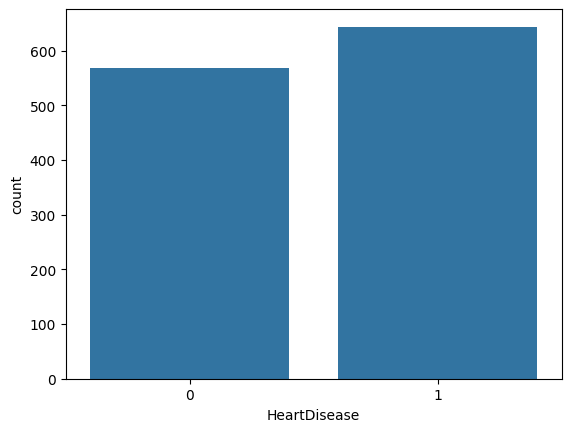

In [30]:
sns.countplot(data=df, x='HeartDisease');

The target is not completely imbalanced, with approximately 53% of cases showing some form of heart disease.

In [31]:
# Statistical summary of the numerical variables
numerical_cols = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
df[numerical_cols].describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,1213.0,53.735367,9.334455,28.0,47.0,54.0,60.0,77.0
Cholesterol,1213.0,210.420445,100.691494,0.0,188.0,228.0,269.0,603.0
MaxHR,1213.0,139.931575,25.496413,60.0,122.0,141.0,160.0,202.0
Oldpeak,1213.0,0.923495,1.087470,-2.6,0.0,0.6,1.6,6.2
RestingBP,1213.0,132.201979,18.293525,0.0,120.0,130.0,140.0,200.0


(5, 2)


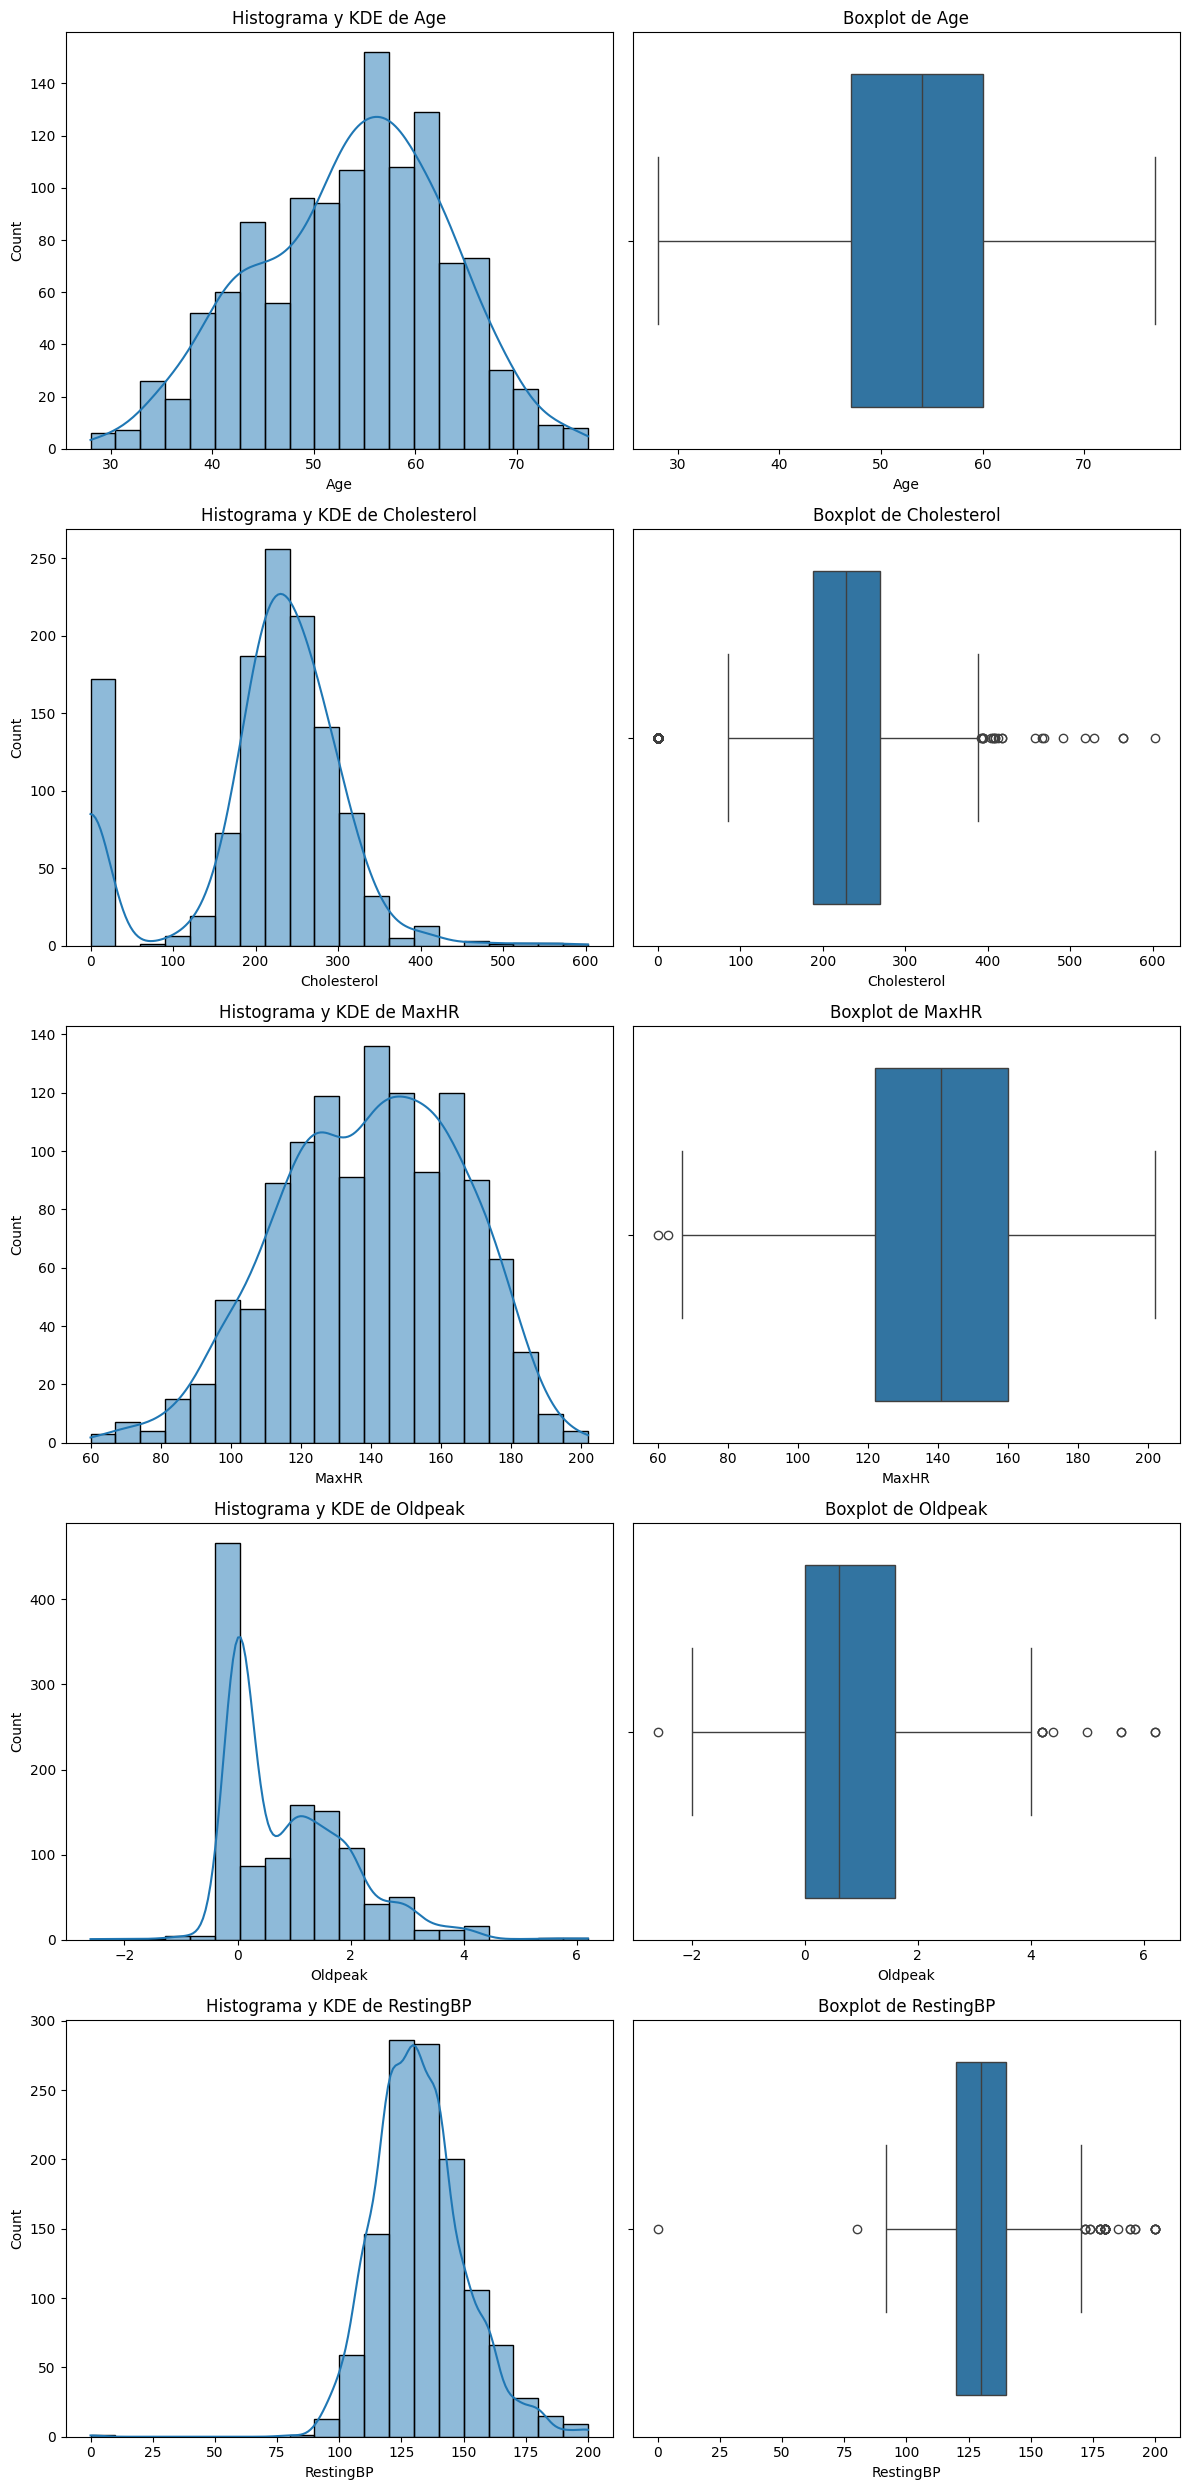

In [32]:
# Univariate analysis of numerical variables
plot_combined_graphs(df, numerical_cols, bins = 20)

The most significant findings are as follows:

- Age: The majority of patients fall between the ages of 50 and 65.  
- Cholesterol: There are many outliers at the higher end and a considerable number of cases with 0 cholesterol, suggesting it might have been used synonymously with N/A. I will replace these with the mean to preserve the distribution.  
- Oldpeak: Shows negative outliers and high values.  
- RestingBP: Exhibits a long tail at lower values and outliers at higher numbers.  
- Outliers carry significant meaning in this dataset, so I will retain them.

#### Treatment of Cholesterol

In [33]:
## finding number of cholesterol values which are marked as 0

zero_Cholesterol = len(df[df.Cholesterol == 0])
print("Number of rows having Cholesterol value as 0:", zero_Cholesterol)

Number of rows having Cholesterol value as 0: 172


In [34]:
## finding median and replacing 0 values with median

chol_median = df[df.Cholesterol != 0]['Cholesterol'].median()
#chol_median = round(chol_median,2)
df['Cholesterol'] = df['Cholesterol'].replace(0, chol_median)
#print(chol_median)

In [35]:
# Verify the imputation
df['Cholesterol'].describe()

count    1213.000000
mean      244.309975
std        53.120073
min        85.000000
25%       213.000000
50%       239.000000
75%       269.000000
max       603.000000
Name: Cholesterol, dtype: float64

In [36]:
## confirming 0 is replaced

zero_Cholesterol = len(df[df.Cholesterol == 0])
print("Number of rows having Cholesterol value as '0' after replacing '0s' with median:", zero_Cholesterol)

Number of rows having Cholesterol value as '0' after replacing '0s' with median: 0


We replace 172 zero values in the Cholesterol column with the median of the column.

### Distribution of categorical variables

In [37]:
# Frequency of categorical variables
categorical_cols = ['ChestPainType', 'ExerciseAngina', 'FastingBS', 'RestingECG', 'ST_Slope', 'Sex']
for col in categorical_cols:
    print(df[col].value_counts())
    print("---------------------")


ChestPainType
ASY    637
NAP    285
ATA    222
TA      69
Name: count, dtype: int64
---------------------
ExerciseAngina
N    745
Y    468
Name: count, dtype: int64
---------------------
FastingBS
False    956
True     257
Name: count, dtype: int64
---------------------
RestingECG
Normal    701
LVH       334
ST        178
Name: count, dtype: int64
---------------------
ST_Slope
Flat    596
Up      534
Down     83
Name: count, dtype: int64
---------------------
Sex
M    927
F    286
Name: count, dtype: int64
---------------------


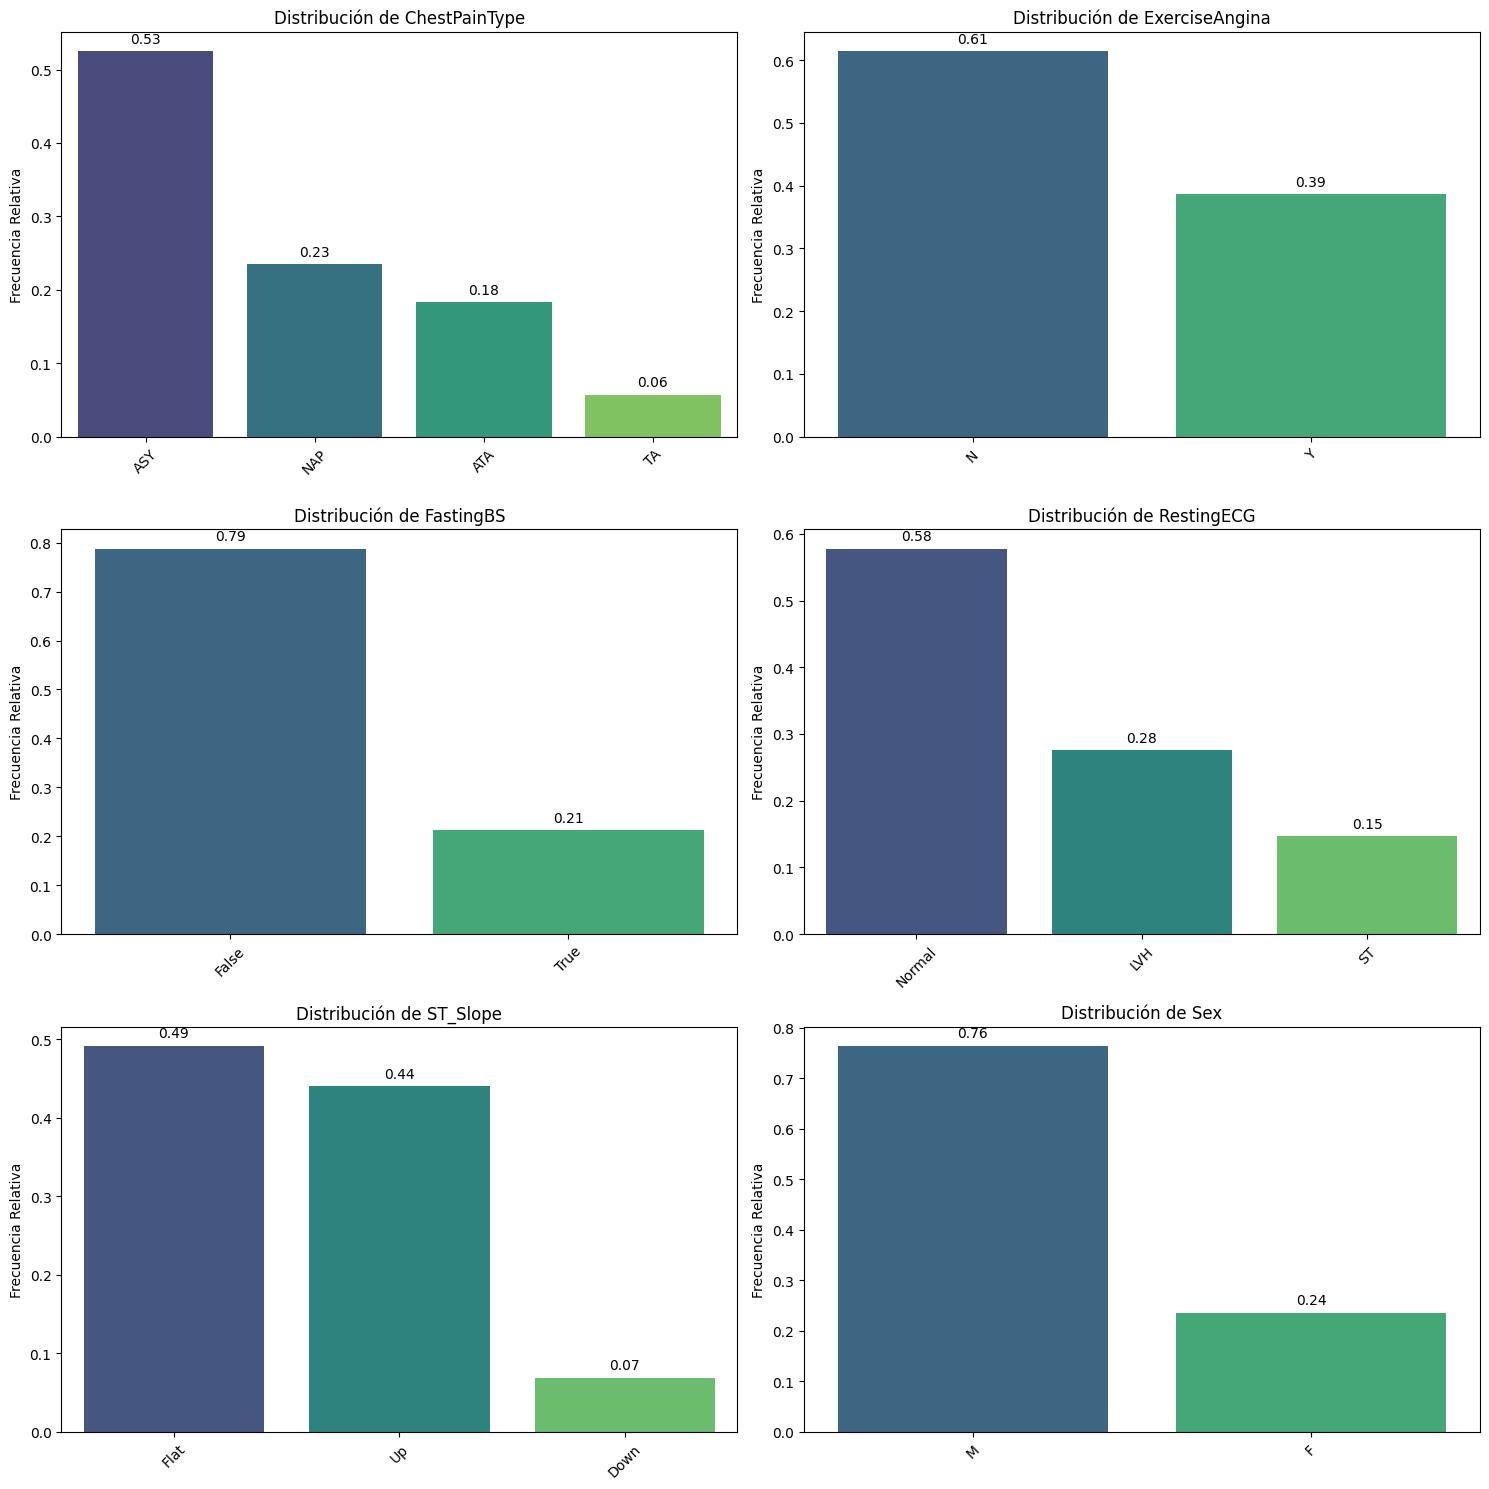

In [38]:
pinta_distribucion_categoricas(df, categorical_cols, relativa= True, mostrar_valores= True)

The most significant findings for each categorical variable:

- ChestPainType: The category with the fewest cases recorded is Typical Angina (TA) with 6%.
- ExerciseAngina: Exercise-induced angina is present in 39% of the cases (True).
- Fasting Blood Sugar: 79% of cases have False results, and 21% have True results.
- ECG observation at resting condition: Normal is observed in 58% of cases, LV Hypertrophy in 28%, and ST Abnormality in 15%.
- ST_Slope: The slope of the peak exercise ST segment is Flat in 49% of cases, Upsloping in 44%, and Downsloping in 7%.
- Sex: The number of female patients (24%) is much lower compared to male patients (76%).

### Correlation analysis between numerical variables

In [39]:
# Correlation Analysis

# Move the column 'HeartDisease' to the beginning
target = 'HeartDisease'
cols = [target] + [col for col in df if col != target]
df = df[cols]

# We analyze the correlation among the numerical variables and the target.
corr = df.corr(numeric_only = True)
corr[target].sort_values(ascending = False)

HeartDisease    1.000000
Oldpeak         0.400398
Age             0.266001
FastingBS       0.216503
RestingBP       0.119333
Cholesterol     0.073124
MaxHR          -0.413410
Name: HeartDisease, dtype: float64

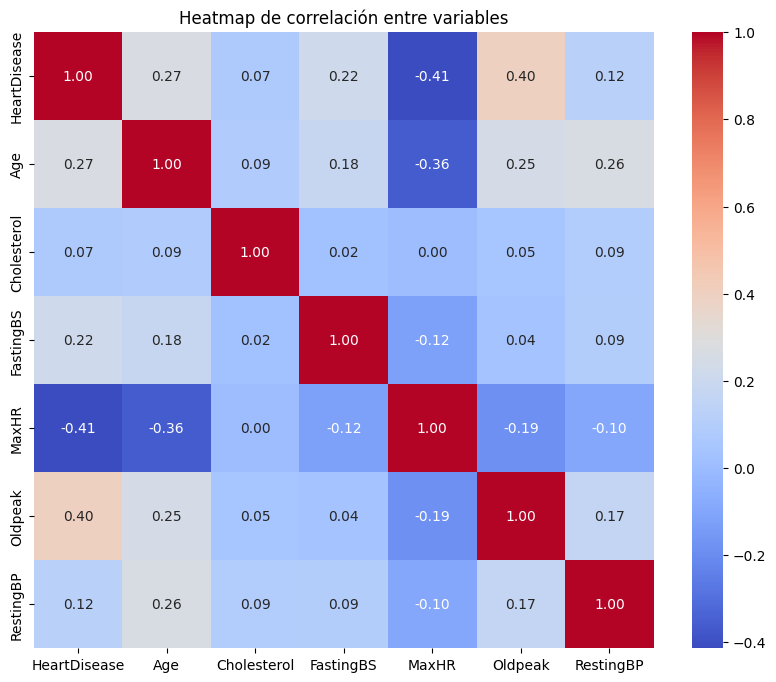

In [40]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only = True),annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlación entre variables')
plt.show();

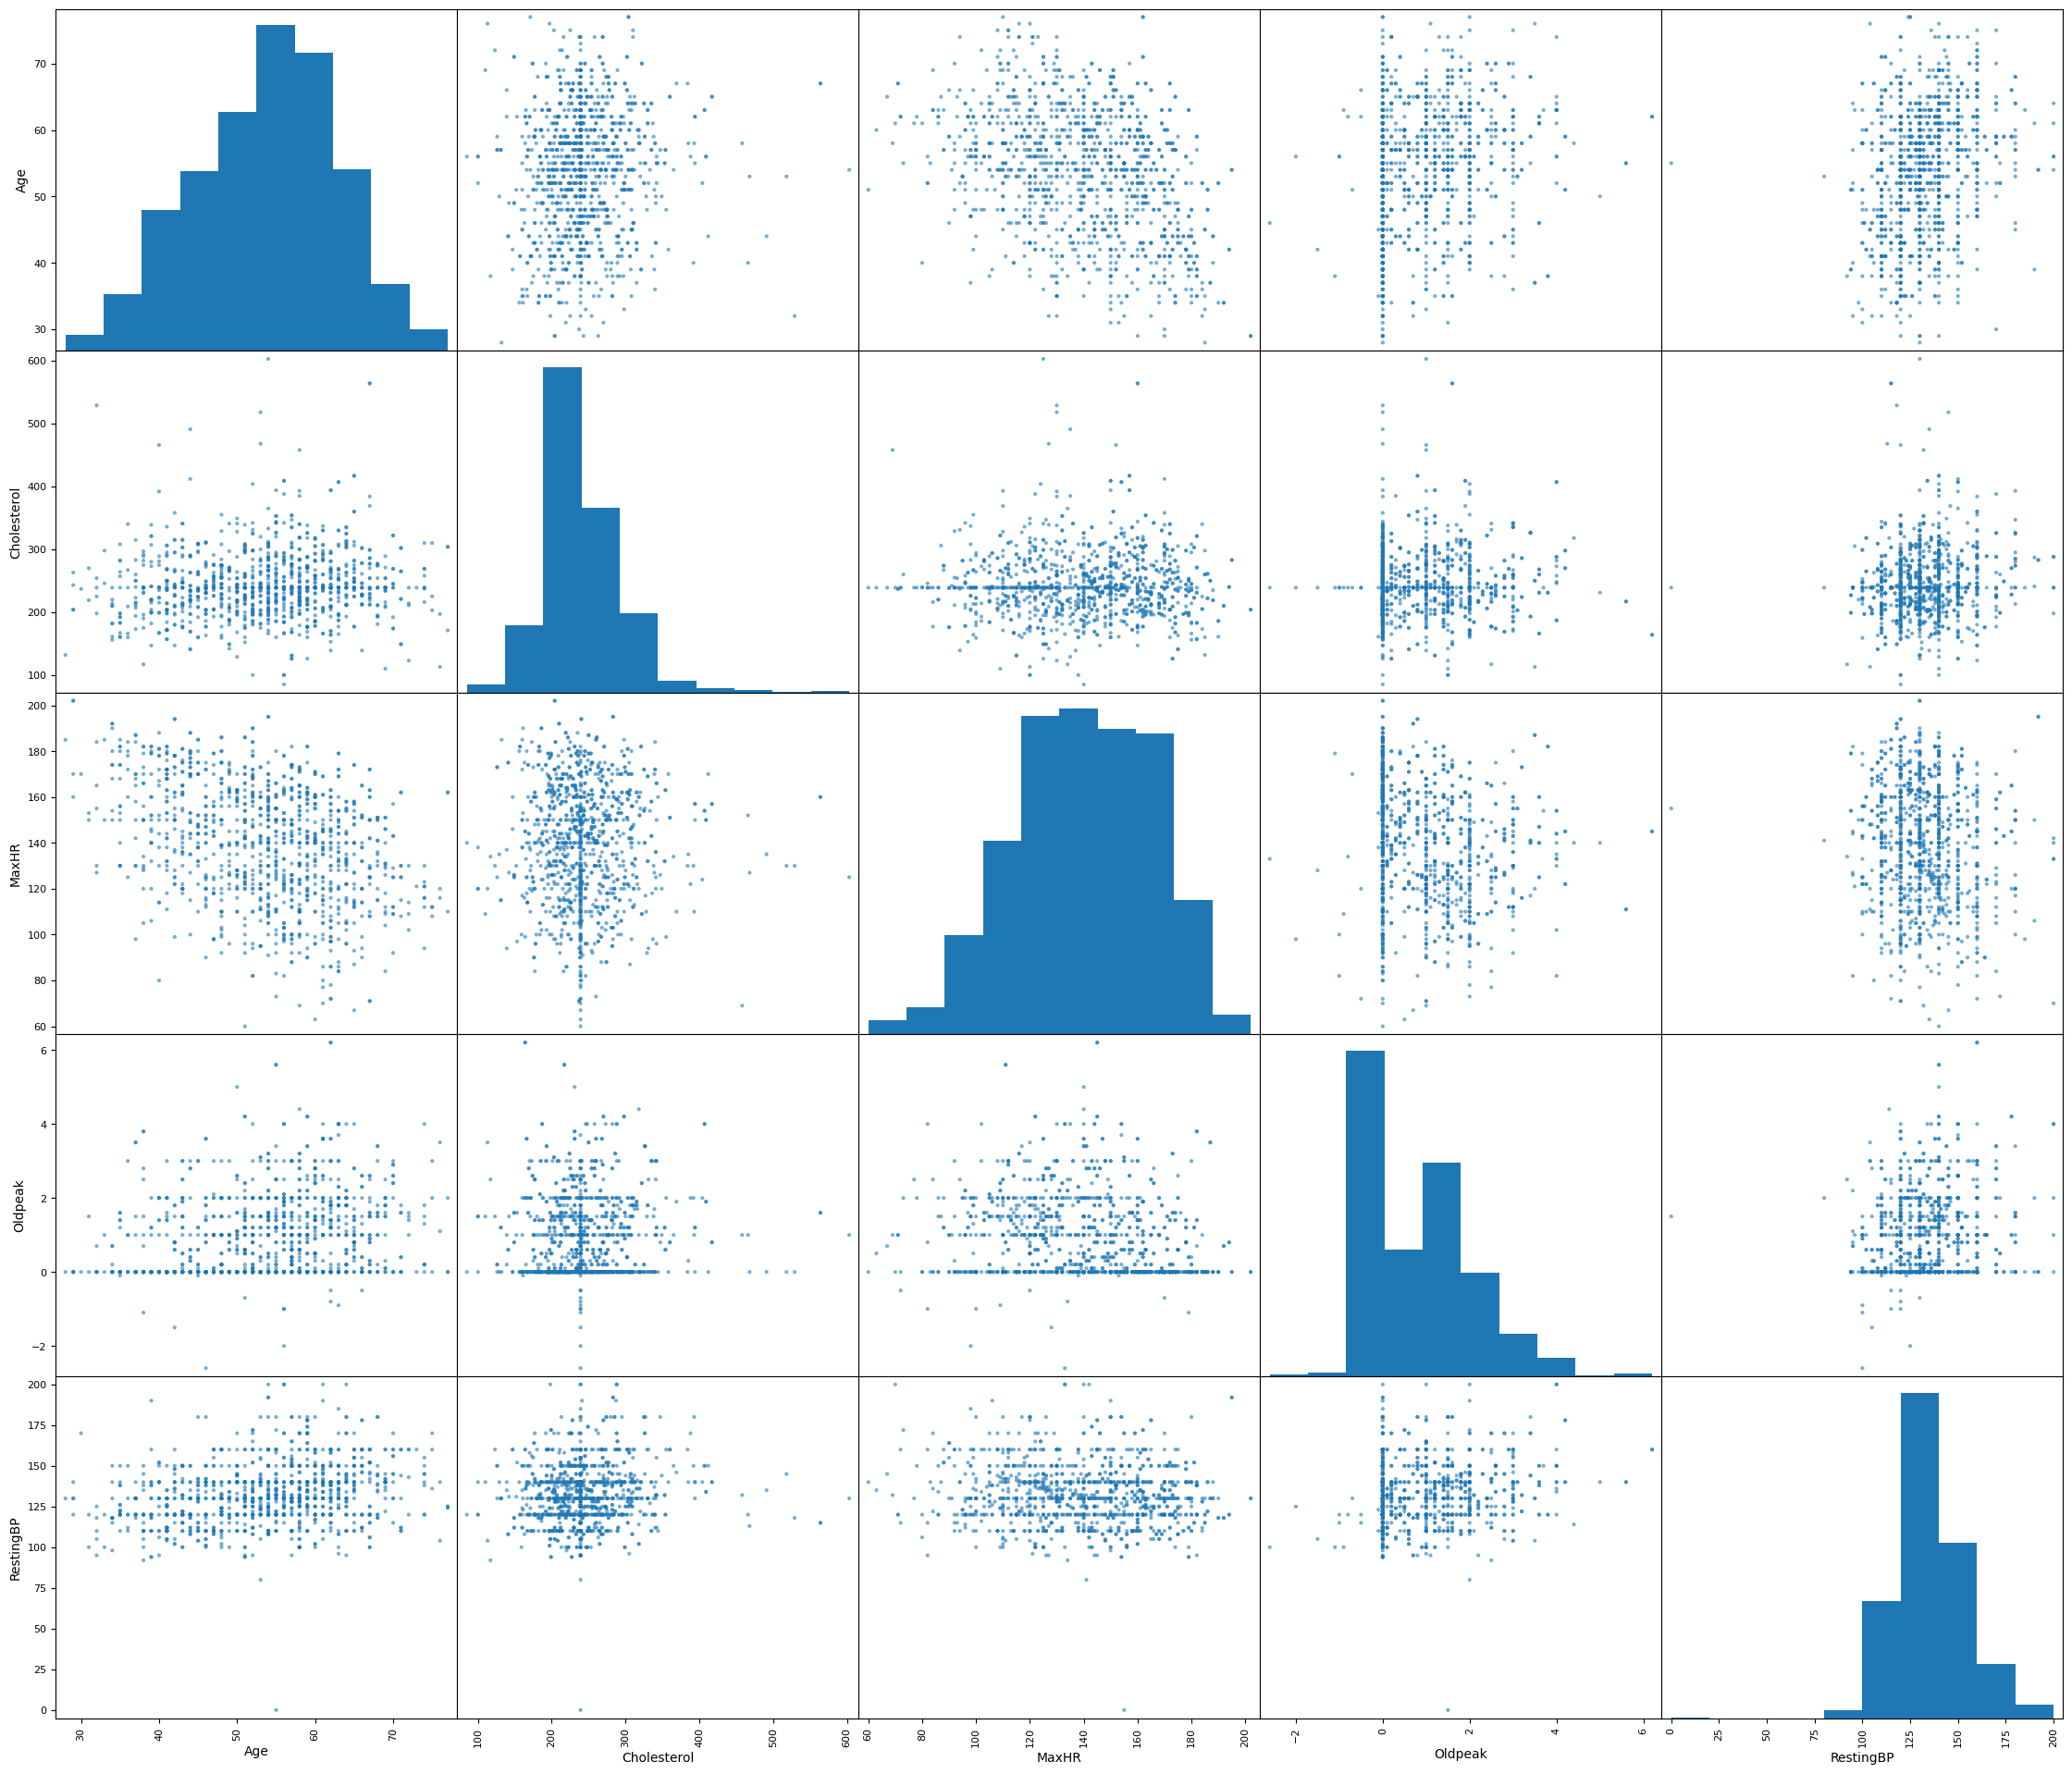

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_cols], figsize=(28, 24)  ,alpha = 0.6)
plt.show()

### Analysis of relationships between variables and the target

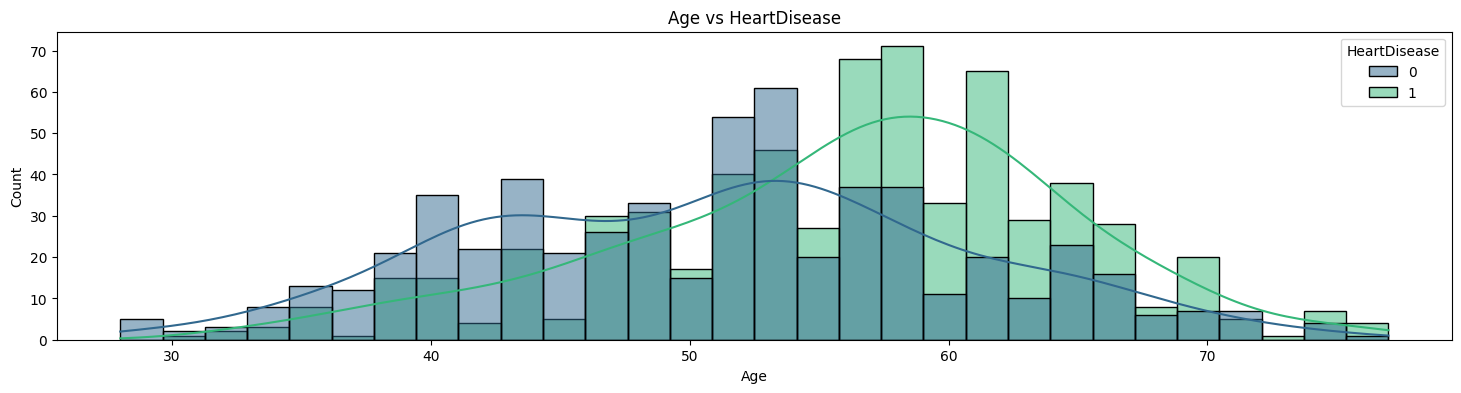

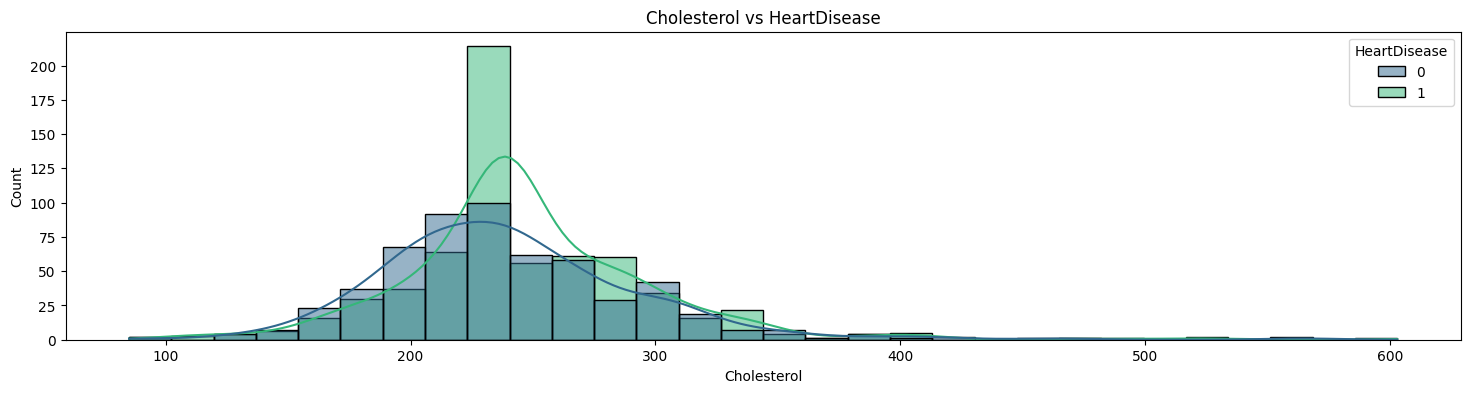

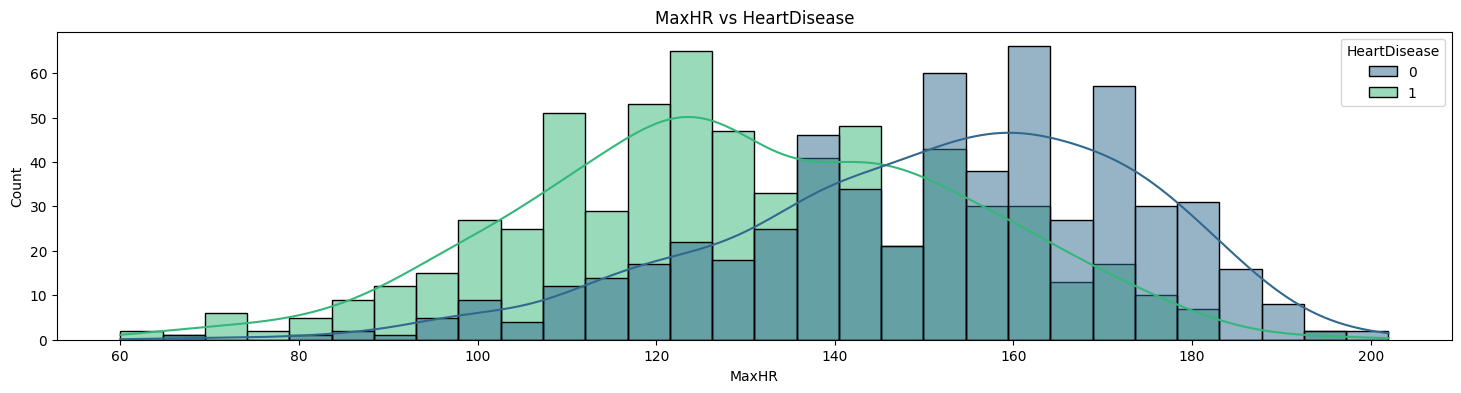

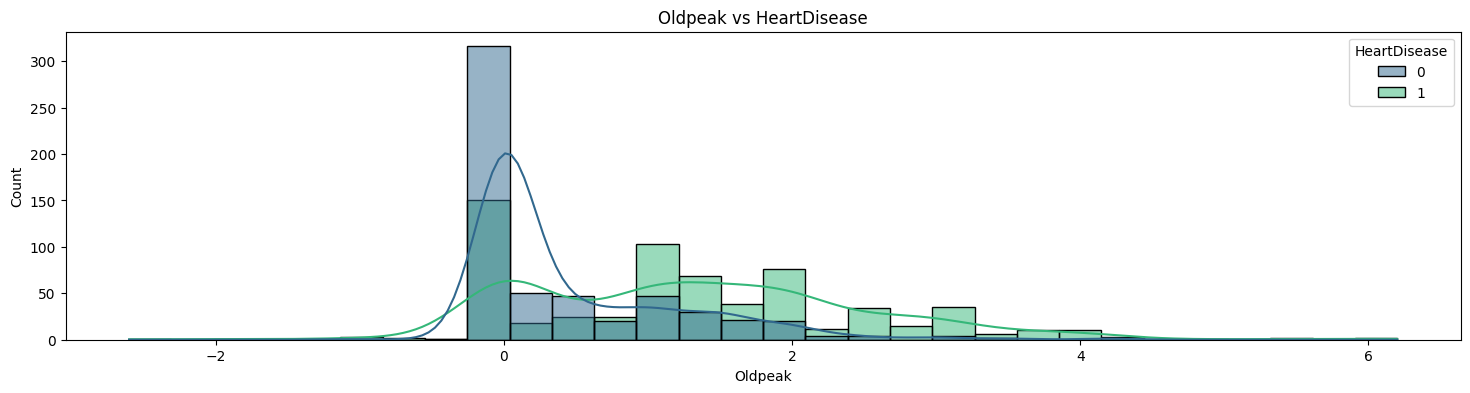

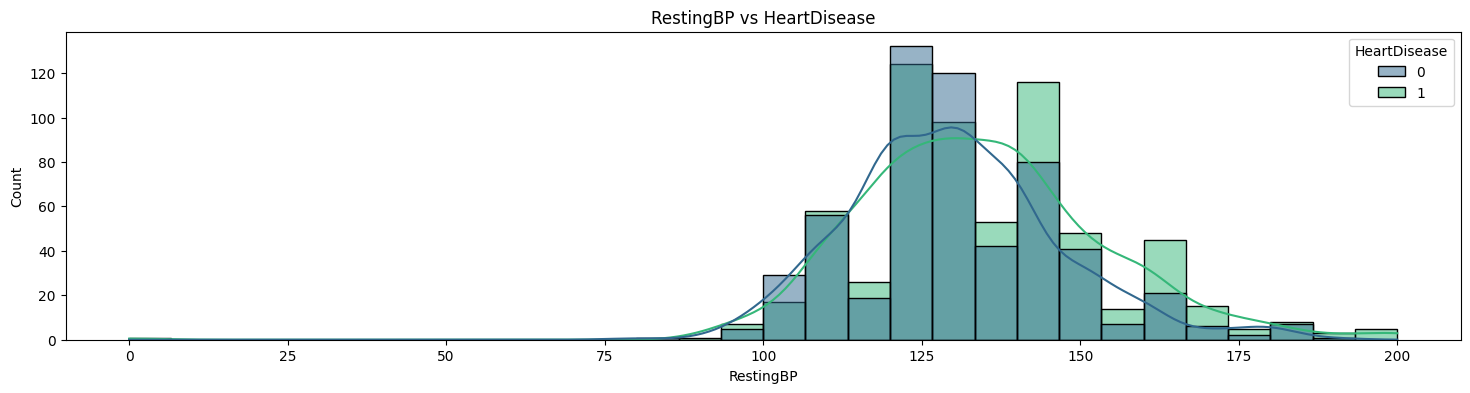

In [42]:
# Relationship between numerical variables and HeartDisease
for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=df, x=col, hue="HeartDisease", bins=30, kde=True  ,palette='viridis')
    plt.title(f'{col} vs HeartDisease')
    plt.show()


Notes: 
- The minimum age to have a heart disease starts from 28 years old.
- Most of the people get heart disease at the age of 50 years.

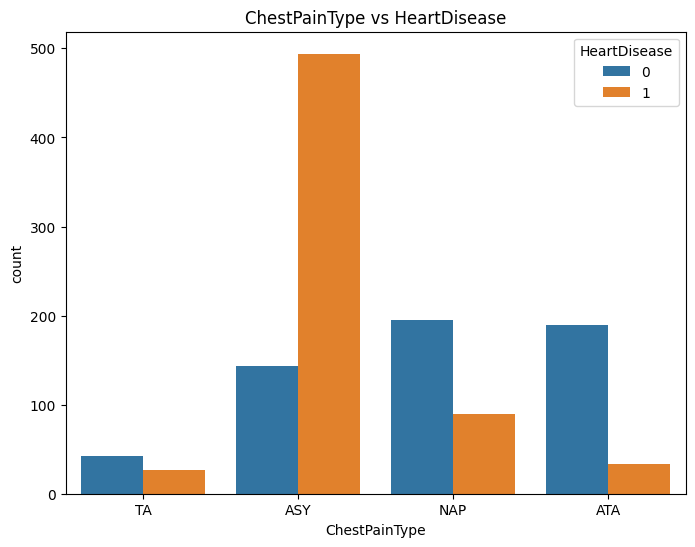

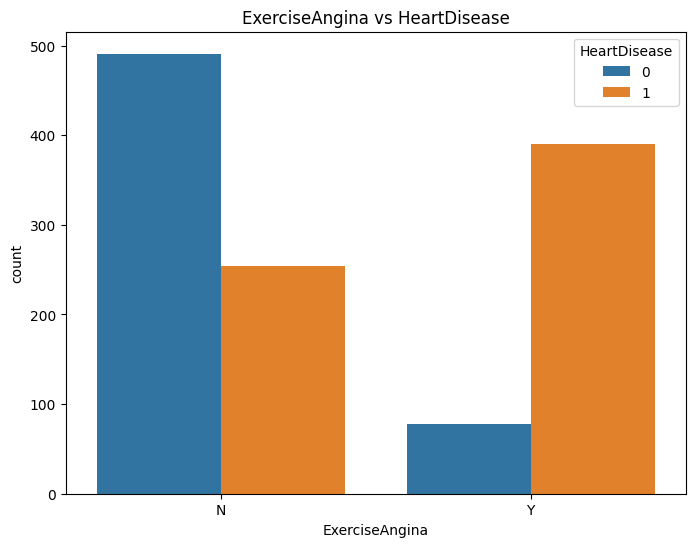

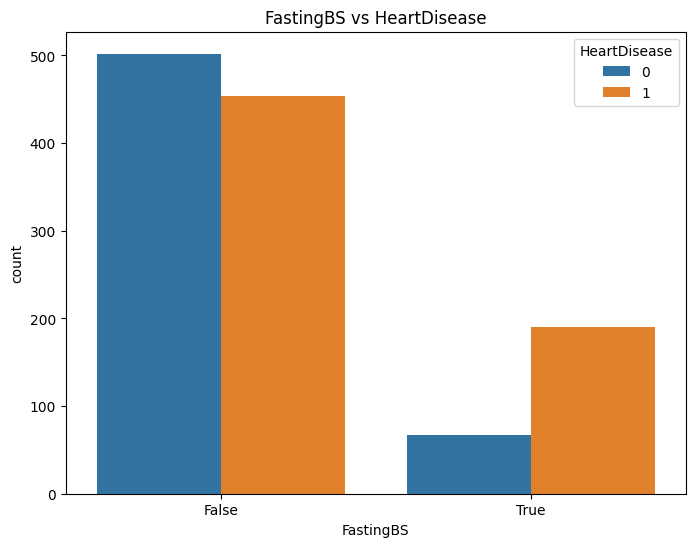

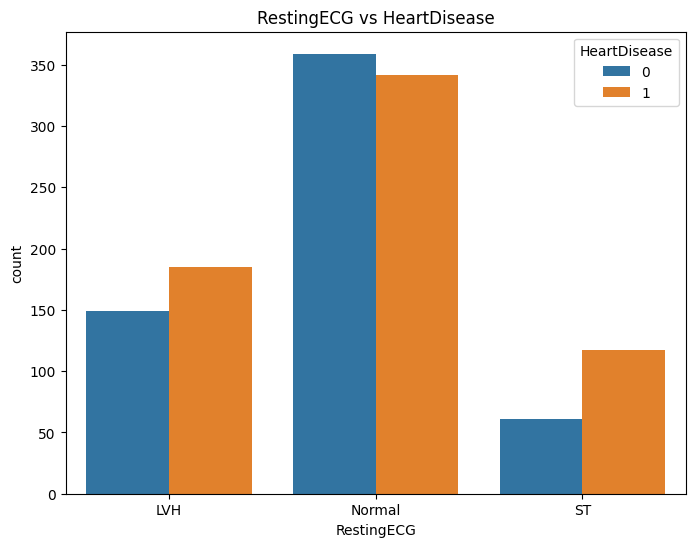

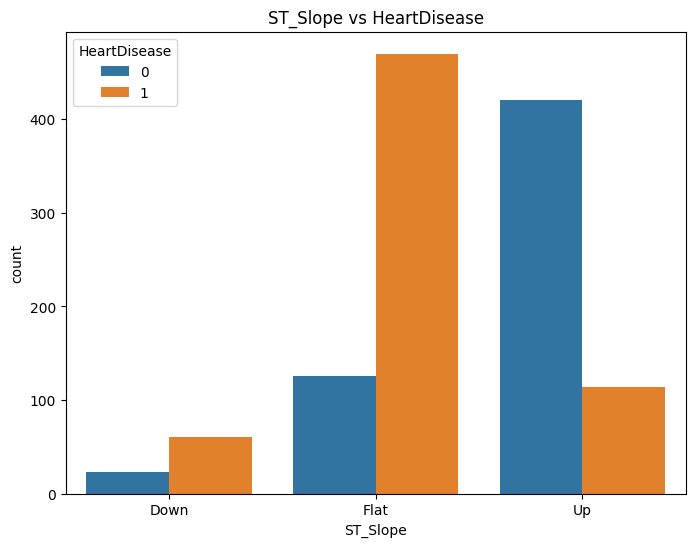

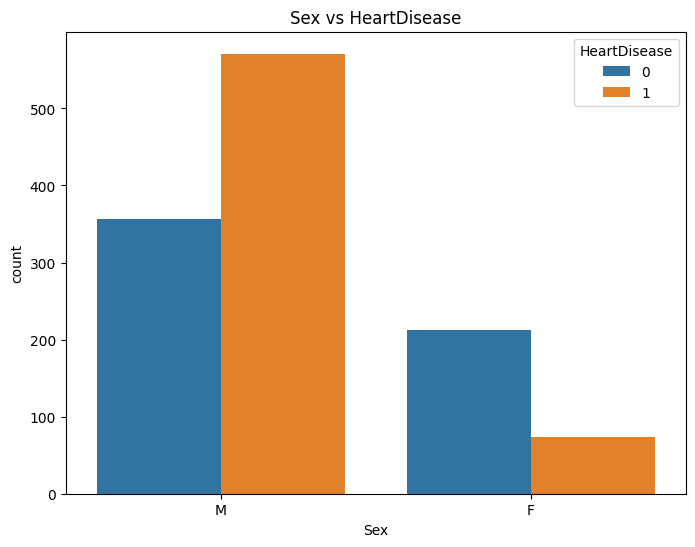

In [43]:
# Relationship between categorical variables and HeartDisease
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'{col} vs HeartDisease')
    plt.show()

In [44]:
# Creating dummy variables for categorical variables
categorical_cols = ['ChestPainType', 'ExerciseAngina', 'FastingBS', 'RestingECG', 'ST_Slope', 'Sex']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [45]:
df.head(5)

,HeartDisease,Age,Cholesterol,MaxHR,Oldpeak,RestingBP,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,FastingBS_True,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,0,63,233.0,150.0,2.3,145.0,False,False,True,False,True,False,False,False,False,True
1,1,67,286.0,108.0,1.5,160.0,False,False,False,True,False,False,False,True,False,True
2,1,67,229.0,129.0,2.6,120.0,False,False,False,True,False,False,False,True,False,True
3,0,37,250.0,187.0,3.5,130.0,False,True,False,False,False,True,False,False,False,True
4,0,41,204.0,172.0,1.4,130.0,True,False,False,False,False,False,False,False,True,False


In [46]:
# Verification of the transformed dataset
df_info_after_dummies = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartDisease       1213 non-null   int64  
 1   Age                1213 non-null   int64  
 2   Cholesterol        1213 non-null   float64
 3   MaxHR              1213 non-null   float64
 4   Oldpeak            1213 non-null   float64
 5   RestingBP          1213 non-null   float64
 6   ChestPainType_ATA  1213 non-null   bool   
 7   ChestPainType_NAP  1213 non-null   bool   
 8   ChestPainType_TA   1213 non-null   bool   
 9   ExerciseAngina_Y   1213 non-null   bool   
 10  FastingBS_True     1213 non-null   bool   
 11  RestingECG_Normal  1213 non-null   bool   
 12  RestingECG_ST      1213 non-null   bool   
 13  ST_Slope_Flat      1213 non-null   bool   
 14  ST_Slope_Up        1213 non-null   bool   
 15  Sex_M              1213 non-null   bool   
dtypes: bool(10), float64(4),

We converted the categorical variables into dummy variables, resulting in a dataset with 16 columns.

In [47]:
df.columns

Index(['HeartDisease', 'Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'ExerciseAngina_Y', 'FastingBS_True', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'Sex_M'],
      dtype='object')

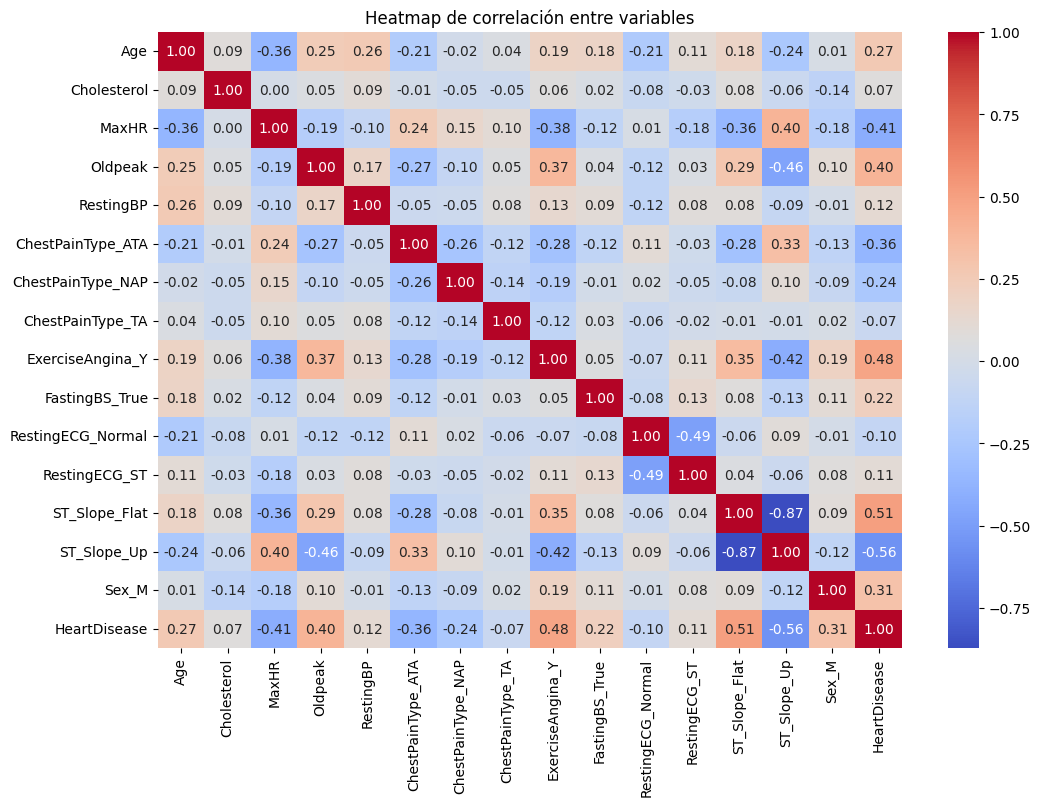

HeartDisease         1.000000
ST_Slope_Flat        0.507476
ExerciseAngina_Y     0.480302
Oldpeak              0.400398
Sex_M                0.306828
Age                  0.266001
FastingBS_True       0.216503
RestingBP            0.119333
RestingECG_ST        0.105029
Cholesterol          0.073124
ChestPainType_TA    -0.068706
RestingECG_Normal   -0.100917
ChestPainType_NAP   -0.238892
ChestPainType_ATA   -0.362550
MaxHR               -0.413410
ST_Slope_Up         -0.564090
Name: HeartDisease, dtype: float64


In [48]:
# Move the column 'HeartDisease' to the end.
target = 'HeartDisease'
cols = [col for col in df if col != target] + [target]
df = df[cols]

# We calculate the correlation matrix.
corr_matrix = df.corr()

# We create a heatmap.
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlación entre variables')
plt.show()

# Specific correlation analysis with the target
correlation_with_target = df.corr()['HeartDisease'].sort_values(ascending=False)
print(correlation_with_target)


We generate a heatmap to visualize the correlation between the variables.  

We observe that Oldpeak and MaxHR have significant correlations with the target variable HeartDisease.

### Conclusions
- The dataset is clean and ready for modeling.
- Outliers and missing values have been handled appropriately.
- Relationships between variables and the target variable have been analyzed.
- New features have been created, and variables have been transformed to potentially enhance model performance.

In [49]:
# Save the preprocessed dataset.
processed_file_path = '../data_sample/data_final_preprocessed.csv'
df.to_csv(processed_file_path, index=False)